<div class="alert alert-success" role="alert">
  <h4 class="alert-heading">Bienvenue</h4>
    asdfasdfhave <i>any</i> asdfasdf
</div>

## Imports

In [1]:
import random                  
from fractions import Fraction   
import functools
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo, dynamics

### MuseScore3 Windows

In [2]:
# Windows (adapt Program Files)
musescore_executable = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe'

environment.set('musescoreDirectPNGPath', musescore_executable)
environment.set('musicxmlPath', musescore_executable)
environment.set('autoDownload', 'allow')

### MuseScore3 Mac

In [3]:
# Mac path
musescore_executable = '/Applications/MuseScore 3.app/Contents/MacOS/mscore'

environment.set('musescoreDirectPNGPath', musescore_executable)
environment.set('musicxmlPath', musescore_executable)
environment.set('autoDownload', 'allow')

# Tools

In [3]:
# random numbers
random.seed(0);

# function to return key for any value
def getKeyFromValue(_dictionnary, _value):
    for key, value in _dictionnary.items():
         if _value == value:
             return key
 
    return None; #doesn't exist

## Music Tools

In [4]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play();
    
#This function takes two notes and checks whether they represent the same note without looking at the octave. It returns true if they represent the same note and false otherwise
def isSameNoteWithoutOctave(note1, note2):
    
    if note1.pitch.name == note2.pitch.name: 
        return True;
    
    # To lose the octave information
    n1 = note.Note(pitch = note1.pitch.name);
    n2 = note.Note(pitch = note2.pitch.name);
    
    if n1.pitch.frequency == n2.pitch.frequency:
        return True;
    
    return False;

##### Example using the function *isSameNoteWithoutOctave()*

In [5]:
d = note.Note("D#3");
e = note.Note("Eb5");

print(isSameNoteWithoutOctave(d,e));

True


## Math Tools

In [6]:
def gaussParameter(x, doubleSigma, mu): # with value 1 at x = mu
    sigma = doubleSigma/2;
    return math.exp(-1/2*(x-mu)**2/sigma**2); #1/sigma/math.sqrt(2*math.pi)*

def gaussFunction(doubleSigma, mu = 0):
    return functools.partial(gaussParameter, mu = mu, doubleSigma = doubleSigma);


def intervalParameter(x, a):
    if x >= -a and x <= a:
        return 1;
    return 0;

def intervalFunction(a):
    return functools.partial(intervalParameter, a=a)

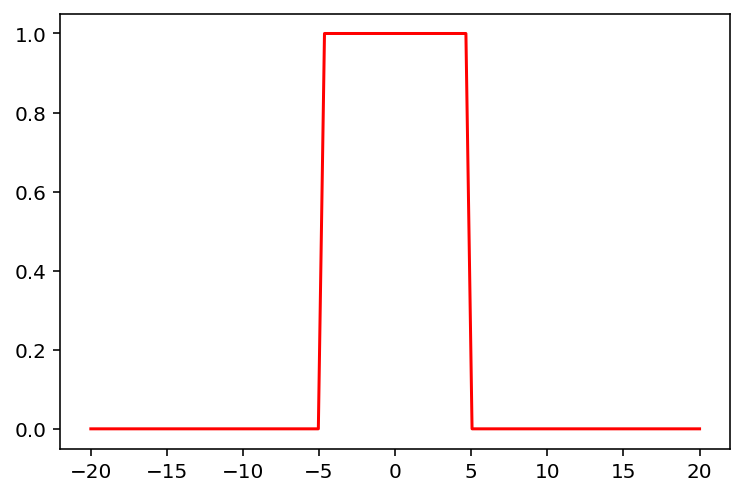

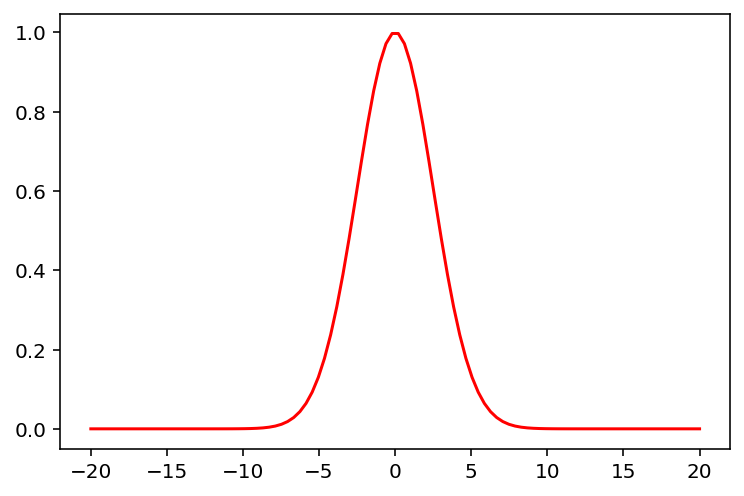

In [7]:
f = intervalFunction(5);

x = np.linspace(-20,20,100);
y = np.zeros(len(x));
for i in range(len(x)):
    y[i] = f(x[i]);

plt.plot(x,y, 'r');
plt.show();

f = gaussFunction(5);

x = np.linspace(-20,20,100);
y = np.zeros(len(x));
for i in range(len(x)):
    y[i] = f(x[i]);

plt.plot(x,y, 'r');
plt.show();

# Scale

### Scales interval dictionnary
###### Scales interval dictionnary links the name of the scale and the amount of numbers between each note starting from the base note

In [8]:
scalesIntervalDictionnary = {
  "major": [0,2,4,5,7,9,11],
  "minor": [0,2,3,5,7,8,10],
  "dorian": [0,3,7] ##
}

### Scale class
###### Scale is a class generating a musical scale / a range starting from the base note and the type of scale (major, minor, dorian or else). It can also generate a scale from a random base and random type.

In [9]:
class Scale:
    
    # Constructor
    def __init__(self, _baseNote = note.Note('C4'), _interval = scalesIntervalDictionnary["major"], _randomBase = False, _randomMinorMajorScale = False):
              
        if _randomBase == True:
            self.baseNote = note.Note(pitch = random.randint(0,11));
        else: 
            self.baseNote = _baseNote;
             
        if _randomMinorMajorScale == True:
            r = random.randint(0,1);
            if r == 1:
                self.interval = scalesIntervalDictionnary["major"];
            else:
                self.interval = scalesIntervalDictionnary["minor"];
        else:
            self.interval = _interval;
        
    
    # Transposes the base note (of i semi tones) --> DELETED, NOT USED ANYMORE
    def baseTranspose(self, i):
        return self.baseNote.transpose(i);
    
    # Gets the ith tone of the scale, i = 1 returns the fundamental, i = 2 returns the "seconde"
    def getTone(self, i):
        return self.baseNote.transpose(self.interval[(i-1)%len(self.interval)]);
    
    # Get notes of the scale without considering the octave
    def getNotesWithoutOctave(self):       
        n = [self.baseNote.transpose(i) for i in self.interval];
        return n;
    
    # is the given ton on the scale
    def isToneOnScale(self, note):
        for i in range(len(self.interval)):
            if isSameNoteWithoutOctave(self.baseNote.transpose(self.interval[i]), note):
                return True;
        return False;
    
    # is Minor if the third minor is on the scale
    def isMinor(self):
        return self.isToneOnScale(self.baseNote.transpose(3));
    
    # is Major if the third major is on the scale
    def isMajor(self):
        return self.isToneOnScale(self.baseNote.transpose(4));
    
    
    # show is a function that shows all the notes of the scale.
    def show(self):   
        text = self.baseNote.pitch.name;
        if self.isMajor():
            text += " major";
        if self.isMinor():
            text += " minor";
        print(text, self.interval);  
        
        m = stream.Measure();
        m.append([self.baseNote.transpose(i) for i in self.interval]);     
        m.append(self.baseNote.transpose(12));
        m.show();
        
  

###### Scale is a class generating a musical scale / a range starting from the base note and the type of scale (major, minor, dorian or else). It can also generate a scale from a random base and random type. Example of a scale. The scale constructed here is the C minor scale

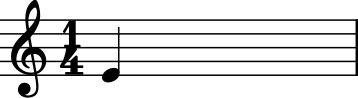

minor: False
C major [0, 2, 4, 5, 7, 9, 11]


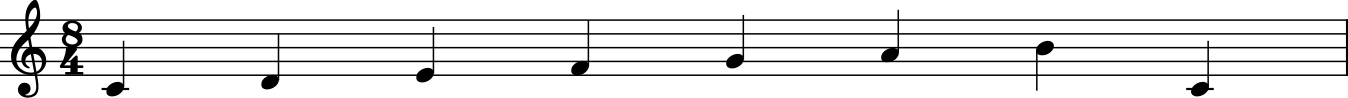

In [10]:
s = Scale(note.Note("C"), scalesIntervalDictionnary["major"]);
s.getTone(3).show() # la tierce
print("minor:", s.isMinor())
s.show();

## Chord

### Chords type dictionnary

In [11]:
chordsDictionnary = {
  "": [0,4,7],
  "5": [0,7],
  "m": [0,3,7],
  "7": [0,4,7,10],
  "m7": [0,3,7,10]
}

### Chord Class
###### Chord is a class constructing a chord based on a base note and a scale

In [12]:
class Chord:
    
    # Constructor
    def __init__(self, _baseNote, _scale):

        self.baseNote = _baseNote;
        self.interval = [0]; # 1th and 5th
        
        if _scale.isToneOnScale(_baseNote.transpose(3)) == True:
            self.interval.append(3);
        elif _scale.isToneOnScale(_baseNote.transpose(4)) == True:           
            self.interval.append(4);
            
        self.interval.append(7);
        
    def copy(self):
        b = note.Note(pitch = self.baseNote.pitch.name);
        c = Chord(b, Scale());
        c.interval = self.interval;
        return c;
    
        
               
    # Define (like a constructor)
    def defineByType(self, _baseNote, _type = ""):       
        self.baseNote = _baseNote;
        self.interval = chordsDictionnary[_type];
            
            
    def getType(self):
        key = getKeyFromValue(chordsDictionnary, self.interval);
        if key != None:
            return key;
        return "Not in dictionnary";
    
    
    def getName(self):
        return self.baseNote.name + self.getType();
    
    # Get notes
    def getNotesWithoutOctave(self):       
        n = [self.baseNote.transpose(i) for i in self.interval];
        return n;
    
    
    # _octave definition of the baseNote and then transposes
    def getNotesWithOctave(self, _octave = 4, _quarterLength = 1):  
        b = note.Note(pitch = self.baseNote.transpose(i).pitch.name, octave = _octave, quarterLength = _quarterLength;
        n = [note.Note(pitch = self.baseNote.transpose(i).pitch.name, octave = _octave, quarterLength = _quarterLength) for i in self.interval];
        return n;
    
    
    def getChordObject(self,  _octave = 4, _quarterLength = 1):
        return chord.Chord(self.getNotesWithOctave(_octave = _octave, _quarterLength = _quarterLength));
    
    # Show
    def show(self):
        self.getChordObject().show();
        
    def getText(self):
        return self.baseNote.pitch.name + " " + self.getType();
        
    def showText(self):
        print(self.getText());  
        
    def chordNotes(self):
        notes = []
        for element in self.interval:
            notes.append(element)
            print(element)
    

In [13]:
c = Chord(_baseNote = note.Note("F"), _scale = s);
c.chordNotes()

0
4
7


###### Example of a chord construction. The chord is constructed base on the note F and the scale s defined in the previous example.

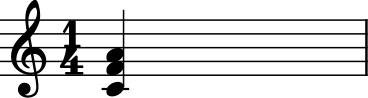

F
[0, 4, 7]
[<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
sdf


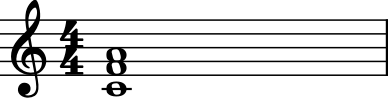

sdf
<music21.note.Note C>
C3
C
3
<music21.note.Note C>


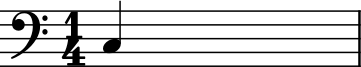

In [14]:
c = Chord(_baseNote = note.Note("F"), _scale = s);
c.show();
print(c.getName());
print(c.interval)
print(c.getNotesWithOctave())
print("sdf")
c.getChordObject(_quarterLength = 4).show();
print("sdf")


a = [0,3,7];
[note.Note(pitch = note.Note("C").transpose(i).pitch, octave = 1) for i in a]

n = note.Note(pitch = note.Note("C").pitch.name, octave = 3)
#n = note.Note(pitch = note.Note("C").transpose(i).pitch.name, octave = 3)
print(n)
print(n.pitch)
print(n.pitch.name)
print(n.pitch.octave)


bassNote = note.Note(pitch = "C", octave = 3);
print(bassNote)
bassNote.show()


## NotesRange

### NotesRange Class

In [15]:
class NotesRange:
    
    # Constructor
    def __init__(self, _octaveNumber = 8):  
        
        self.range = {}; # Dictionnary
        for o in range(_octaveNumber):
            for i in range(0,12):
                n = note.Note(pitch = i);
                self.range[n.pitch.name + str(o)] = 0;   
        
        self.range["C" + str(o+1)] = 0; # highest C
                
                
    # Add chance/probability to notes (without octave) 
    # if _probability is empty, then all notes' probability will be increased by 1 
    def addChanceToNotesWithoutOctave(self, _notes = [], _probabilities = [], _probability = 1):
        
        if len(_notes) != 0 and len(_probabilities) < len(_notes):
            _probabilities = [_probability for i in _notes];
        
        for key in self.range:
            for x in range(len(_notes)):
                if isSameNoteWithoutOctave(note.Note(key), _notes[x]) == True:
                    self.range[key] += _probabilities[x];
        return;
    
    
    def multiplyChanceToNotesWithoutOctave(self, _notes = [], _probabilities = [], _probability = 1):
        
        if len(_notes) != 0 and len(_probabilities) < len(_notes):
            _probabilities = [_probability for i in _notes];
        
        for key in self.range:
            for x in range(len(_notes)):
                if isSameNoteWithoutOctave(note.Note(key), _notes[x]) == True:
                    self.range[key] *= _probabilities[x];
        return;
    
    
    # Mulitiply by a function. 0 is the _zeroNote and then +1 for the next note etc, 12 is the distance for an octave
    def multiplyByFunction(self, _function, _zeroNote = note.Note("C4")):              
        keysLength = len(self.range.keys());
        for key in self.range.keys():             
            x = note.Note(key).pitch.midi - _zeroNote.pitch.midi;                     
            #print(key + "  " + str(x) + " f(x): " + str(_function(x)))
            self.range[key] *= _function(x);   
            
    # Add a function to the NotesRange  
    def addFunction(self, _function, _zeroNote = note.Note("C4")):
              
        keysLength = len(self.range.keys());
        for key in self.range.keys():             
            x = note.Note(key).pitch.midi - _zeroNote.pitch.midi;                     
            self.range[key] += _function(x); 
    
    # Add another NotesRange
    def addNotesRange(self, _noteRange):
        for key in self.range.keys():      
            self.range[key] += _noteRange.range[key];   
            
            
    def pickRandomNote(self):
        totalProbability = 0;
        for key in self.range.keys(): 
            totalProbability += self.range[key];
        
        if totalProbability == 0:
            print("NotesRange.pickRandomNote() has no solution!");
            self.showPlot();
        
        r = random.uniform(0,totalProbability);
        #print(str(totalProbability) +"  " + str(r));
        
        counter = 0;
        for key in self.range.keys():
            counter += self.range[key];
            if counter >= r:
                return note.Note(key);          
        return None; # empty notesRange
    
    # Show 
    def show(self):
        print(self.getText());
        
    # Get Text for show()
    def getText(self):
        txt = "{ ";
        for key in self.range.keys():
            value = self.range[key];
            if value != 0:
                txt += key + ": " + str(value) + ", ";
                
        if txt == "{ ":
            return "{ empty NotesRange }";
        return txt[:-2] + " }";
    
    
    # Show Full NotesRange   
    def showFull(self):
        print(self.range);
        
    # Show Plot
    def showPlot(self):
        keys = self.range.keys();
        values = self.range.values();
        plt.bar(keys, values);

###### The following cell serves as a test for the NotesRange class.

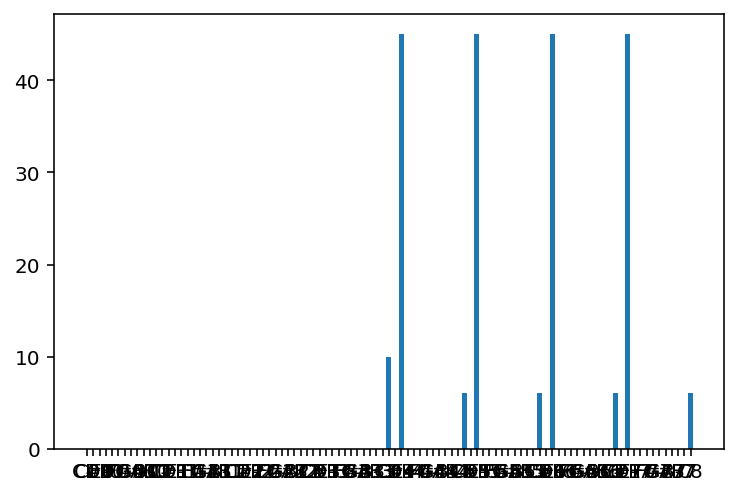

In [16]:
# NotesRange test

nr = NotesRange();

nr.addChanceToNotesWithoutOctave([note.Note("C"),note.Note("D")], [2,15]);


def ff(x): 
    if x < 0:
        return 0;
    if x == 0:
        return 5;
    return 3;


nr.multiplyByFunction(ff);
nr.showPlot();

### Bass test 2

Scale:  C major [0, 2, 4, 5, 7, 9, 11]
C major [0, 2, 4, 5, 7, 9, 11]


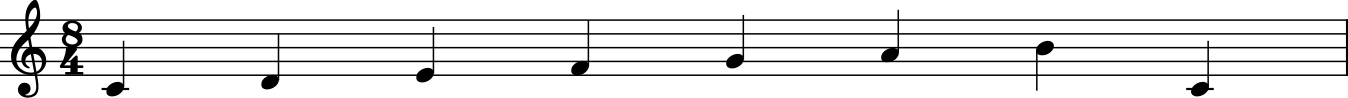


NotesRange:
0 { D2: 1, E2: 3, F2: 1, G2: 3, A2: 1 }
1 { C2: 1, D2: 1, F2: 1, G2: 3, A2: 1, C3: 1 }
2 { C2: 3, D2: 1, E2: 3, F2: 1, G2: 1, C3: 3 }
3 { C2: 3, D2: 1, E2: 1, G2: 1, A2: 3, C3: 3 }
4 { C2: 1, E2: 1, F2: 3, G2: 1, A2: 3, C3: 1 }
5 { D2: 1, E2: 3, F2: 1, G2: 3, A2: 1 }
6 { C2: 3, D2: 1, E2: 3, F2: 1, G2: 1, C3: 3 }
7 { D2: 1, E2: 3, F2: 1, G2: 3, A2: 1 }

Chords:
0 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
1 E m [<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note B>]
2 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
3 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
4 D m [<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
5 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
6 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
7 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]


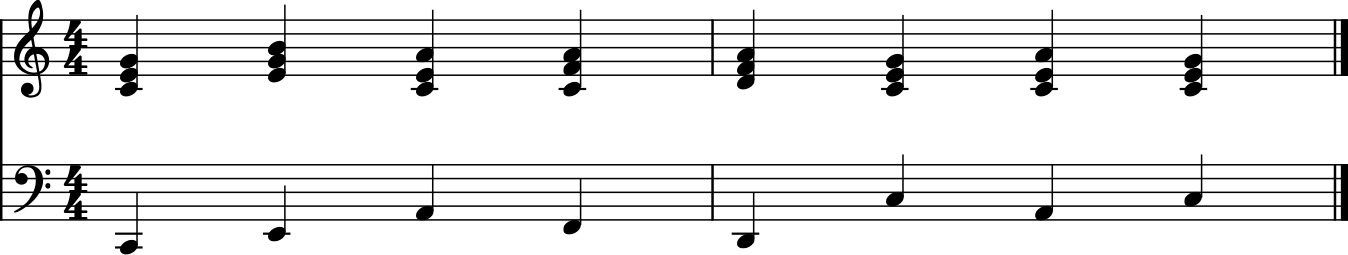

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


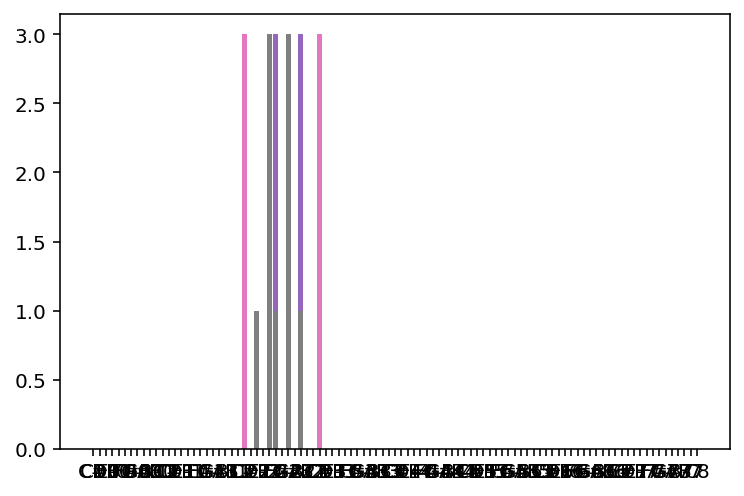

In [17]:
### Random scale
#s = Scale(_randomBase = True, _randomMinorMajorScale = True);
s = Scale(note.Note("C"), scalesIntervalDictionnary["major"]);


scaleType = "minor";
if s.isMinor() == False:
    scaleType = "major";
print("Scale: ", s.baseNote.pitch.name, scaleType, s.interval);
s.show();




# input
octaveRegion = 2;
nbr = 8;
bassNotes = [];  # stores music21's note.Note()
bassChords = []; # stores Chord objects

bassNotes.append(note.Note(pitch = s.baseNote.pitch.name, octave = octaveRegion)); # bassNotes[0]
bassChords.append(Chord(bassNotes[0], s));                                         # bassChords[0]

print("\nNotesRange:")
for i in range(nbr): 
    
    # Bass Rules
    nr = NotesRange();
    nr.addChanceToNotesWithoutOctave(s.getNotesWithoutOctave()); # notes of the scale
    
    if s.isMinor():
        nr.multiplyChanceToNotesWithoutOctave([s.getTone(2)], _probability = 0);
    if s.isMajor():
        nr.multiplyChanceToNotesWithoutOctave([s.getTone(7)], _probability = 0);
        
    nr.multiplyChanceToNotesWithoutOctave(bassChords[i].getNotesWithoutOctave(), _probability = 3); # notes of the chord from the bassNotes[i]
    nr.multiplyChanceToNotesWithoutOctave([bassNotes[i]], _probability = 0); # avoir playing the same bassNotes[i] again
    nr.multiplyByFunction(intervalFunction(6), note.Note(pitch = 6, octave = octaveRegion)); # range, to stay in the octaveRegion
    
    
    nr.showPlot();
    print(i, nr.getText());
    bassNotes.append(nr.pickRandomNote());     #bassNotes[i+1]
    bassChords.append(Chord(bassNotes[i+1], s)); #bassChords[i+1]
    

print("\nChords:")
score = stream.Score()

measureBassNotes = stream.Part();
measureBassChords = stream.Part();

score.insert(0, measureBassChords);
score.insert(0, measureBassNotes);

for i in range(nbr):
    print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
    measureBassChords.append(bassChords[i].getChordObject());
    measureBassNotes.append(bassNotes[i]);

score.show();
play(score);

# Music generation

## Bass Algorithm

In [18]:
def getBassChords(_scale, _chordsNbr = 4, _octaveRegion = 2):
    
    bassChords = []; # stores Chord objects
    
    startBassNote = note.Note(pitch = _scale.baseNote.pitch.name, octave = _octaveRegion);
    
    bassChords.append(Chord(startBassNote, _scale));   # bassChords[0]

    for i in range(_chordsNbr-1): 

        # Bass Rules
        nr = NotesRange();
        nr.addChanceToNotesWithoutOctave(_scale.getNotesWithoutOctave()); # notes of the scale

        if _scale.isMinor():
            nr.multiplyChanceToNotesWithoutOctave([_scale.getTone(2)], _probability = 0);
        if _scale.isMajor():
            nr.multiplyChanceToNotesWithoutOctave([_scale.getTone(7)], _probability = 0);

        nr.multiplyChanceToNotesWithoutOctave(bassChords[i].getNotesWithoutOctave(), _probability = 3); # notes of the chord from the bassNotes[i]
        nr.multiplyChanceToNotesWithoutOctave([bassChords[i].baseNote], _probability = 0); # avoir playing the same bassNotes[i] again
        nr.multiplyByFunction(intervalFunction(6), note.Note(pitch = 6, octave = _octaveRegion)); # range, to stay in the octaveRegion

        bassChords.append(Chord(nr.pickRandomNote(), _scale)); #bassChords[i+1]
        
    return bassChords;

### Show bass

In [19]:
def showBass(_bassChords, _bassNotes, _play = False):
       
    print("\nChords:")
    score = stream.Score()

    measureBassNotes = stream.Part();
    measureBassChords = stream.Part();

    score.insert(0, measureBassChords);
    score.insert(0, measureBassNotes);
     
    for i in range(len(_bassNotes)):
        print(i, _bassChords[i].getText(), _bassChords[i].getNotesWithoutOctave());  
        measureBassChords.append(_bassChords[i].getChordObject());
        measureBassNotes.append(_bassNotes[i]);

    score.show();
    if _play == True:
        play(score);

## MixMelodyChordsAndBass

In [68]:
def mixMelodyChordsAndBass(_melodyNotes, _bassChords, _bassNotes, _tempo = 60, _play = False, _rythmChordsType = 0):
        
    score = stream.Score()
     
    partMelodyNotes = stream.Part();
    partBassChords = stream.Part();
    partRythmChords = stream.Part();
    partBassNotes = stream.Part();  
    
    partBassNotes.append(tempo.MetronomeMark(number = _tempo)); # defines the tempo of the whole score
    
    score.insert(0, partMelodyNotes); 
    score.insert(0, partBassChords);
    score.insert(0, partRythmChords); 
    score.insert(0, partBassNotes);
      
    for i in range(len(_bassNotes)):
        print(i, _bassChords[i].getText(), _bassChords[i].getNotesWithoutOctave());  
        
        _bassNotes[i].quarterLength = 4;
        partBassNotes.append(_bassNotes[i]);
        partBassChords.append(_bassChords[i].getChordObject(_quarterLength = 4));
        
        # _rythmChordsType 0 : 1-1-1-1/2-1/2
        if _rythmChordsType == 0:
            
            for k in range (0, 4):
                if k == 3:
                    partRythmChords.append(_bassChords[i].getChordObject(_quarterLength = 1/2));
                    partRythmChords.append(_bassChords[i].getChordObject(_quarterLength = 1/2));                   
                else:
                    partRythmChords.append(_bassChords[i].getChordObject(_quarterLength = 1));
        
        # _rythmChordsType 1 : arpeggiated 
        elif _rythmChordsType == 1:
            for k in range(0,8):
                n = _bassChords[i].getNotesWithOctave(_octave = 3, _quarterLength = 1/2)[k%3];
                partRythmChords.append(n);
                
        # 
        
        
    for i in range(len(_melodyNotes)):
        partMelodyNotes.append(_melodyNotes[i]);

    score.show();
    if _play == True:
        play(score);
    
    return score;

sd


## Melody with chords function

In [21]:
def getMelody(_scale, _bassChords, _durations):
        
    melodyNotes = [];
      
    measureCounter = 0;
    quarterLengthCounter = 0;
    
    # start note of the melody, a random note belonging to the first chord
    startNote = _bassChords[0].getNotesWithOctave(_octave = 4)[random.randint(0, len(_bassChords[0].getNotesWithoutOctave())-1)];

    # loop through the _durations
    for i in range(len(_durations)):
            
        # define dur
        dur = abs(_durations[i]);
                
        # Rest convention from the get_path() function
        isRest = dur < 1;
        if isRest:
            dur *= 4;
        else:
            dur /= 4;
                    
        # Actualize the counters
        quarterLengthCounter += dur;
        measureCounter = int(quarterLengthCounter/4-0.01);
        
        # Checks if arrived at the end of the _bassChords
        if measureCounter > len(_bassChords)-1:
            print("finished", measureCounter, len(_bassChords))
            break;
        
        # Rest
        if isRest:                            
            melodyNotes.append(note.Rest(quarterLength = dur));
               
        # Note
        else:                               
            # First note
            if i == 0:          
                melodyNotes.append(note.Note(pitch = startNote.pitch, quarterLength = dur));
            
            # Following notes
            else:       
                # Find previous melody note
                previousMelodyNote = note.Note();
                for u in range(len(melodyNotes)):
                    if type(melodyNotes[u]) is note.Note:
                        previousMelodyNote = melodyNotes[u];
                        break;
                    
                # Melody Rules
                nr = NotesRange();
                # nr.addChanceToNotesWithoutOctave(_scale.getNotesWithoutOctave()); # notes of the scale
                nr.addChanceToNotesWithoutOctave(_bassChords[measureCounter].getNotesWithoutOctave());
                # chordsProbability = int(0.25 * dur**3)*10000000; # more probability on a chord, if the note is longer           
                # nr.multiplyChanceToNotesWithoutOctave(_bassChords[measureCounter].getNotesWithoutOctave(), _probability = chordsProbability); # notes of the chord from the bassNotes[i]
                nr.multiplyByFunction(intervalFunction(6), previousMelodyNote); # to stay close to the previous note
                nr.multiplyByFunction(gaussFunction(12), startNote); # to stay at the melody "height"
                
                # Pick next melody note
                n = nr.pickRandomNote();
                n.quarterLength = dur;
                melodyNotes.append(n)
                
                print("chose Note", n.pitch, "chord", _bassChords[measureCounter].getText());
    
    return melodyNotes;

In [22]:
def getStreamFromNotes(_notes):
    s = stream.Stream();
    s.timeSignature = meter.TimeSignature('4/4');
    s.append(_notes);
    return s;

# The music generator

### Scale

D minor [0, 2, 3, 5, 7, 8, 10]


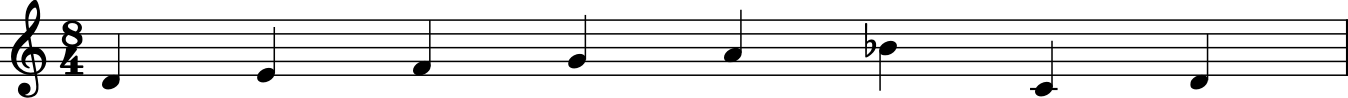

In [53]:
theScale = Scale(_randomBase = True, _randomMinorMajorScale = True);
#theScale = Scale(note.Note("C"));
theScale.show();

### Bass


Chords:
0 D m [<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
1 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
2 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
3 G m [<music21.note.Note G>, <music21.note.Note B->, <music21.note.Note D>]
4 D m [<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
5 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
6 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
7 G m [<music21.note.Note G>, <music21.note.Note B->, <music21.note.Note D>]


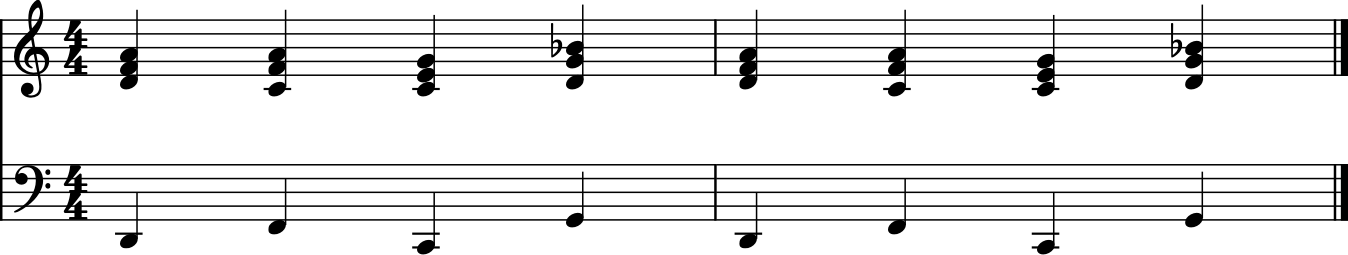

In [54]:
theOctaveRegion = 2;
theChordsNbr = 4;

theBassChords = getBassChords(theScale, theChordsNbr, theOctaveRegion);
for i in range(len(theBassChords)):
    theBassChords.append(theBassChords[i].copy());

theBassNotes = [note.Note(pitch = c.baseNote.pitch.name, octave = theOctaveRegion) for c in theBassChords];

showBass(theBassChords, theBassNotes, _play = True);

### Melody

theDurations [2, 2, 8, 4.0, 8, 2, 1, 5.0, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6.0, 8, 8, 4, 4, 2, 6.0, 8, 8, 16, 8, 8, 8, 2, 4, 2.0, 4, 8, 2, 2, 2, 4, 8, 2.0, 4, 8, 4, 16, 1, 1, 2, 2, 2, 2, 2, 4.0, 8, 8, 4, 8, 4.0, 8, 2, 6.0, 8, 8.0, 16, 16, 2, 8, 6.0, 8, 8, 2, 2]
chose Note A4 chord D m
chose Note A4 chord D m
chose Note A4 chord D m
chose Note C5 chord F 
chose Note A4 chord F 
chose Note C5 chord F 
chose Note F4 chord F 
chose Note C5 chord C 
chose Note C5 chord C 
chose Note C5 chord C 
chose Note E4 chord C 
chose Note G4 chord C 
chose Note G4 chord G m
chose Note B-4 chord G m
chose Note B-4 chord G m
chose Note B-4 chord G m
chose Note B-4 chord G m
chose Note B-4 chord G m
chose Note D5 chord D m
chose Note D5 chord D m
chose Note A4 chord F 
chose Note F4 chord F 
chose Note C5 chord F 
chose Note A4 chord F 
chose Note E4 chord C 
chose Note G4 chord C 
chose Note B-4 chord G m
finished 8 8


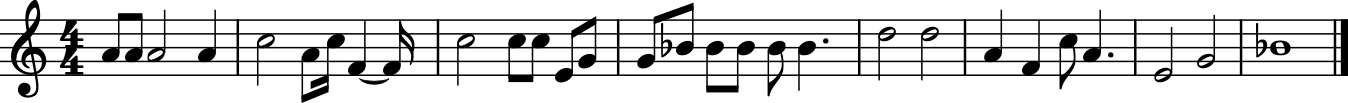

In [55]:
arr = [1, 2, 4, 8, 16, 1/2, 1/4, 1/8]; 
freq = [5, 50, 30, 20, 10, 3, 2, 1];
theDurations = get_path(freq);
print("theDurations",theDurations);

theMelody = getMelody(theScale, theBassChords, theDurations)

melodyStream = getStreamFromNotes(theMelody);
melodyStream.show();

### Mix melody and chords

0 D m [<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
1 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
2 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
3 G m [<music21.note.Note G>, <music21.note.Note B->, <music21.note.Note D>]
4 D m [<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
5 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
6 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
7 G m [<music21.note.Note G>, <music21.note.Note B->, <music21.note.Note D>]


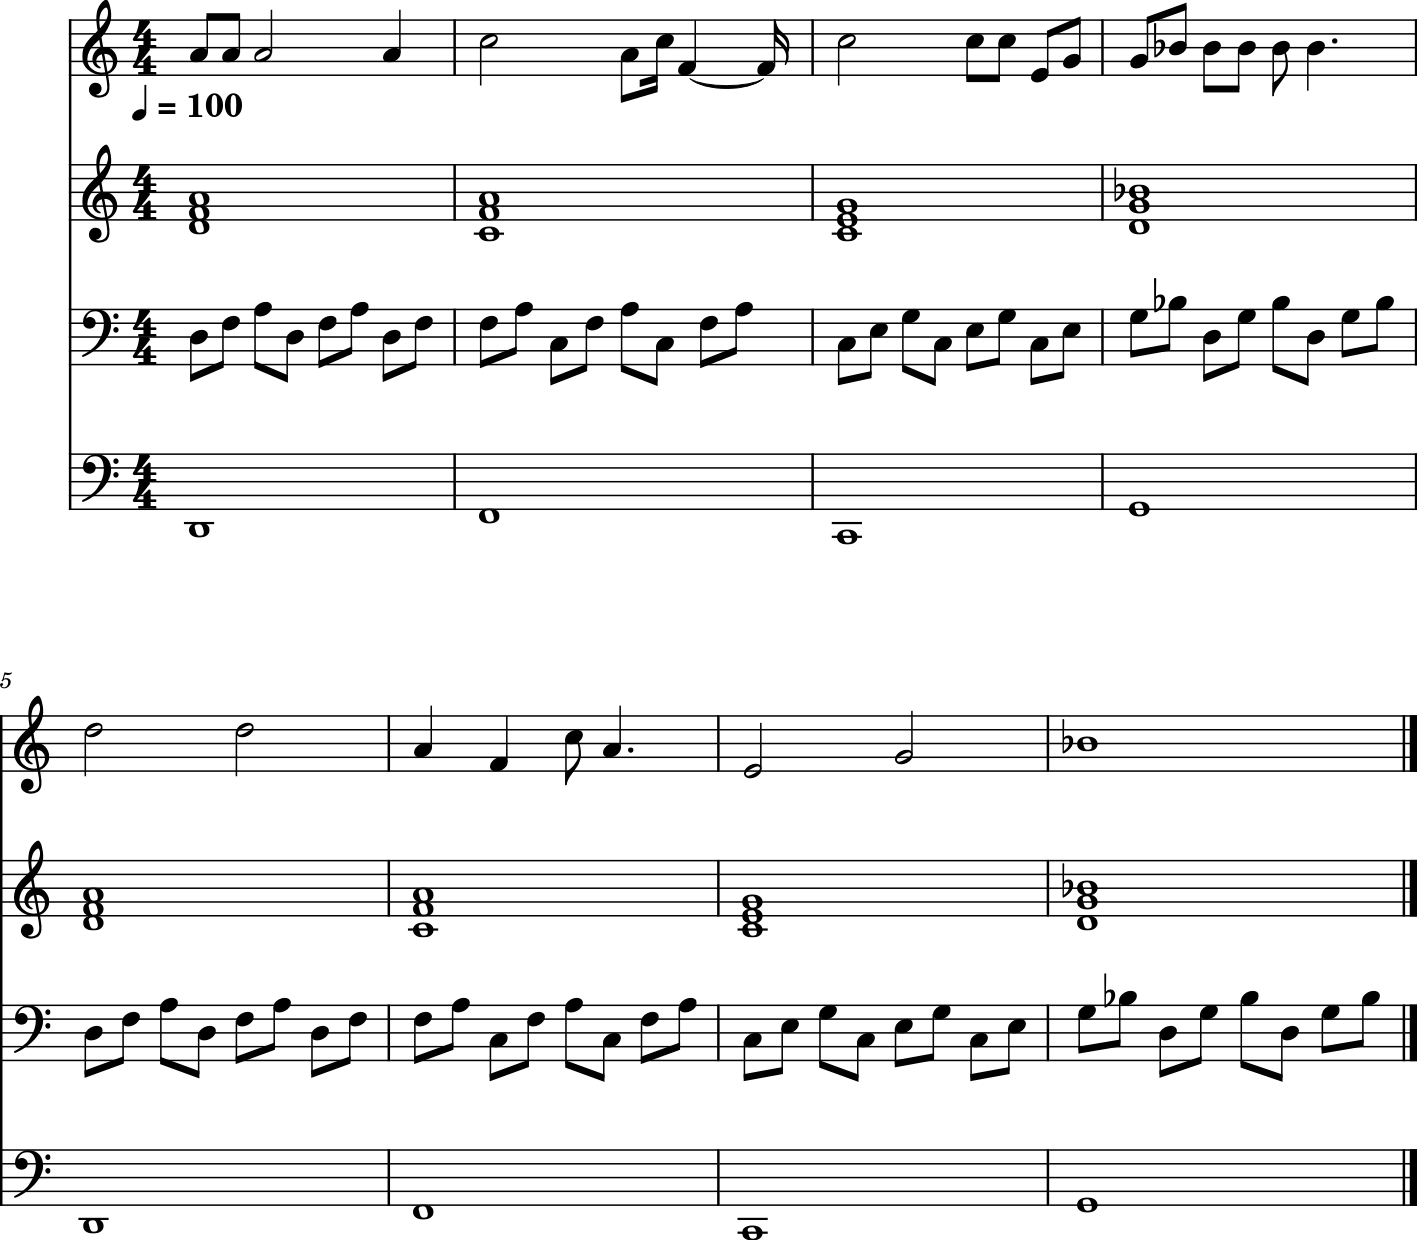

In [69]:
bpm = 100;
theScore = mixMelodyChordsAndBass(theMelody, theBassChords, theBassNotes, bpm, _play = False, _rythmChordsType = 1);

### Instruments

In [70]:
theScore[0].insert(0, instrument.Violin())
theScore[1].insert(0, instrument.Contrabass())
theScore[2].insert(0, instrument.Guitar())
theScore[1].insert(0, dynamics.Dynamic(1))
theScore[1].insert(0, dynamics.Dynamic(0.2))

play(theScore)

# Rhythm section

In [27]:
import random
from music21 import midi, note, stream, instrument, meter, key, duration
import nltk
import mchmm
from fractions import Fraction

# Rhythm generation

In [28]:
def create_percussion(time_sig = None):
    if time_sig == None:
        drumPart = stream.Measure()
    else:
        drumPart = stream.Stream()
        drumPart.timeSignature = meter.TimeSignature(time_sig)
    
    drumPart.insert(0, instrument.TomTom())
    return drumPart

def append_event(duration, original_stream, rest = False, pitch = "C4"):
    new_stream = original_stream
    if rest:
        new_stream.append(note.Rest(quarterLength = duration*4))
    else:
        new_stream.append(note.Note(pitch, quarterLength = duration/4))
                          
    return new_stream

def rhythm_from_sequence(durations, time_sig = None, pitch = 'C4', rhythm=None):
    if rhythm is None:
        rhythm = create_percussion(time_sig = time_sig)
                          
    for dur in durations:
        is_rest = False
        if dur != 0:
            if dur < 1:
                is_rest = True
                dur = Fraction(dur)
            
            rhythm = append_event(dur, rhythm, rest = is_rest, pitch = pitch) 
    return rhythm

# Play the rhythm

In [29]:
def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play()

# The tree

In [30]:
def findCeil(arr, r, l, h) :
 
    while (l < h) :   
        mid = l + ((h - l) >> 1);
        if r > arr[mid] :
            l = mid + 1
        else :
            h = mid
     
    if arr[l] >= r:
        return l
    else :
        return -1
 
def myRand(arr, freq, n):
    prefix = [0] * n
    prefix[0] = freq[0]
    for i in range(n):
        prefix[i] = prefix[i - 1] + freq[i]

    r = random.randint(0, prefix[n - 1]) + 1
    
    indexc = findCeil(prefix, r, 0, n - 1)
    return arr[indexc]
    
def generate_random_tree(arr=[], freq=[], n_arr=0, nodelist=[], idx=0, parent=None, 
                         depth=0, max_children=4, max_depth=4):
    if 0 <= depth < max_depth:
        n = random.randint(1, max_children)
        nodelist.extend([[idx+i, parent, depth, myRand(arr, freq, n_arr)] for i in range(n)])  

        [generate_random_tree(arr, freq, n_arr, nodelist, len(nodelist), idx+i, depth+1, max_children, max_depth) 
                              for i in range(n)]

    elif depth == max_depth:
        n = random.randint(0, max_children)
        nodelist.extend([[idx+i, parent, depth, myRand(arr, freq, n_arr)] for i in range(n)])  
        return
#Build a list of nodes in a random tree up to a maximum depth.
    #:param:    nodelist     list, the nodes in the tree; each node is a list with elements [idx, parent, depth]
    #:param:    idx          int, the index of a node
    #:param:    parent       int, the index of the node's parent
    #:param:    depth        int, the distance of a node from the root
    #:param:    max_children int, the maximum number of children a node can have
    #:param:    max_depth    int, the maximum distance from the tree to the root"""
     
def get_path(freq):
    tree = [[0, None, 0, 1]]
    generate_random_tree(arr, freq, n_arr, nodelist=tree, idx=len(tree), parent=0, depth=1, max_children=3, max_depth=10)

    parent = 0
    path = []
    child = []
    children = 0
    measureCount = 0
       
    while children == 0:
        children = 1

        for x in range(len(tree)):
            if tree[x][1] == parent: #on a trouvé des enfants
                child.append(tree[x][0])
                children = 0
        if child:
            rdm = child[random.randint(0, len(child)-1)]
            actualPath = tree[rdm][3]
            if measureCount == 4:
                measureCount = 0
            if actualPath >= 1:
                if (measureCount + (actualPath/4)) <= 4:
                    path.append(actualPath)
                    measureCount += (actualPath/4)
                else:
                    path.append((4 - measureCount)*4)
                    measureCount = 0
                    path.append(actualPath)
                    measureCount += (actualPath/4)
            else:
                if (measureCount + (actualPath*4)) <= 4:
                    path.append(actualPath)
                    measureCount += (actualPath*4)
                else:
                    path.append((4 - measureCount)/4)
                    measureCount = 0
                    path.append(actualPath)
                    measureCount += (actualPath*4)
            
            parent = tree[rdm][0]
    if path[0] < 1:
        path[0] = 1/path[0]
    
    return path;

 #---------------------------------------------------------------------------------------------------

### Constants
    
# 16:ronde, 8:blanche, 4:noire, 2:croche, 1:double croche
# 1/2:demi pause, 1/4:soupir, 1/8:demi soupir

arr = [1, 2, 4, 8, 16, 1/2, 1/4, 1/8]; 
freq = [5, 50, 30, 20, 10, 3, 2, 1];

random.seed(0)
n_arr = len(arr)

[8, 8.0, 16, 2, 2, 4, 2, 2, 2, 2.0, 4, 4, 4, 2, 2, 2, 14.0, 16, 2, 2, 4, 2, 2, 4.0, 16, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 8, 2, 2.0, 4, 2, 2, 8.0, 16, 4, 2, 2, 8, 2, 2, 2, 2, 2, 2, 4, 16, 4, 2, 4, 2, 2, 2.0, 16, 2, 2, 2, 2, 0.5, 4, 4, 8.0, 16, 2, 1, 4, 1, 2, 2, 4.0, 8, 2, 2, 4, 4, 8, 2, 2, 4, 2, 2, 2, 2, 4, 1, 2, 2, 11.0, 16, 2, 2, 12.0, 16, 2, 8, 2, 2, 2, 1, 4, 4, 4, 3.0, 16, 0.125, 2, 4, 2, 2, 2, 2, 8]
<music21.stream.Stream 0x21d54187ee0>


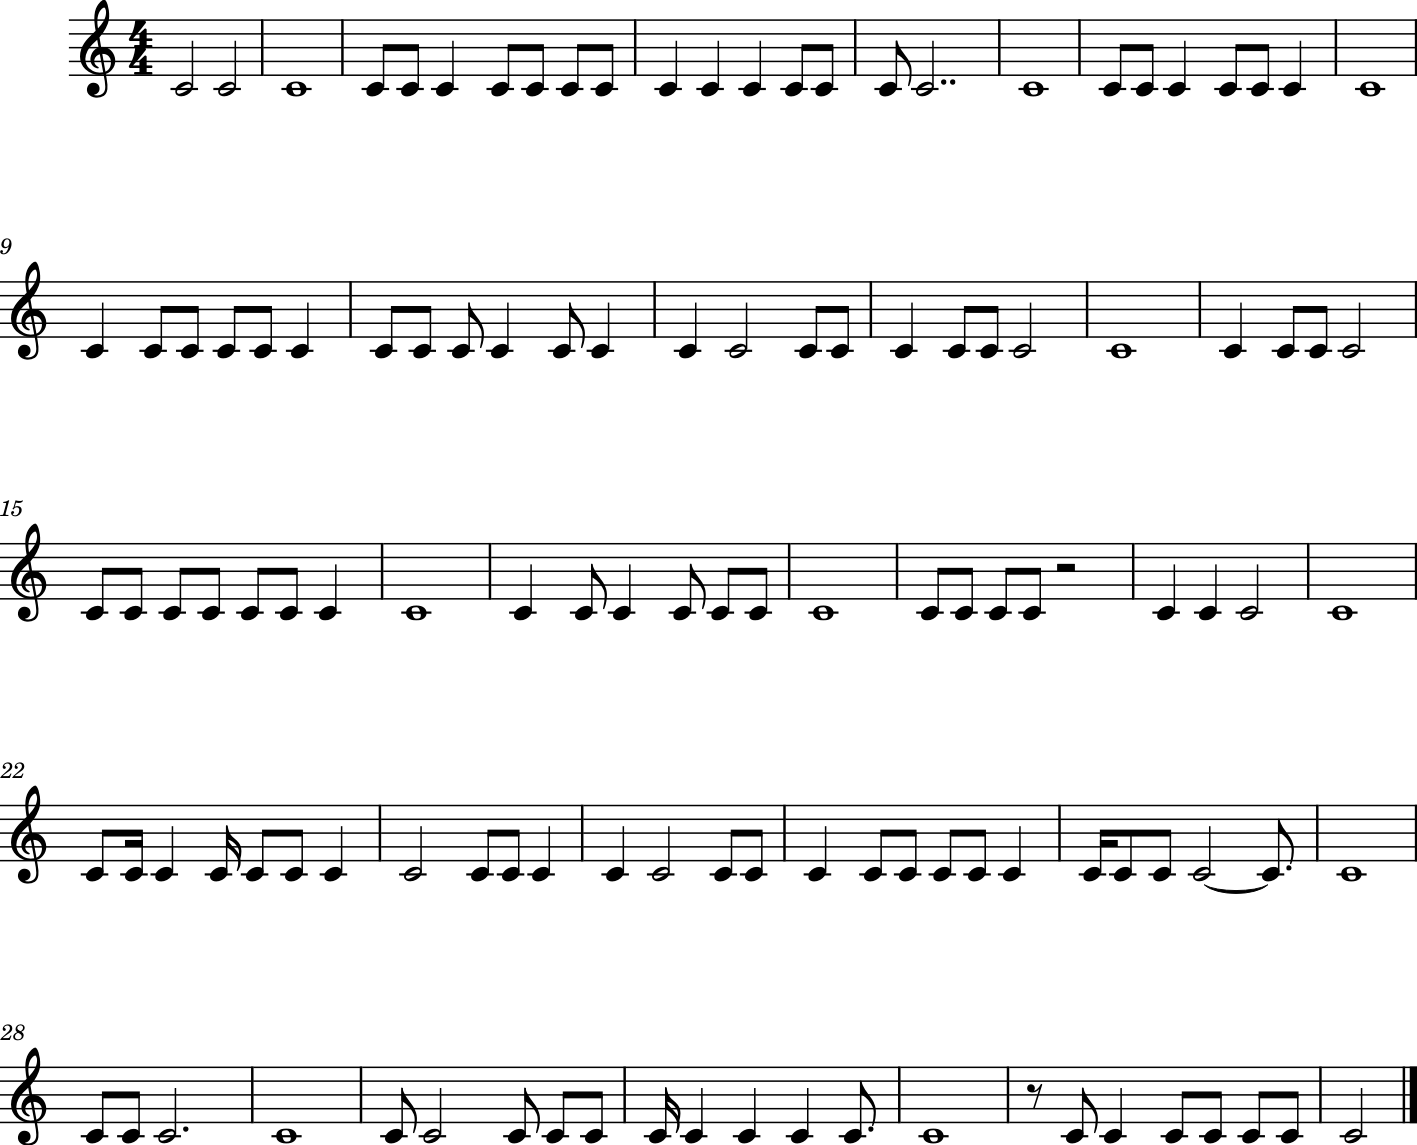

In [31]:
pathH = get_path(freq);
print (pathH)
path_rhythm = create_percussion(time_sig = '4/4')
print(path_rhythm)
path_rhythm = rhythm_from_sequence(pathH, rhythm=path_rhythm)
path_rhythm.show()

In [32]:
#play(path_rhythm)

## Mix Notes and Melody

In [33]:
class Score:
    
    # Constructor
    def __init__(self, _notes, _rhythm ): #_range , _timeSignature = '4/4'):  
        
        #Create the score
        self.Menuet = stream.Score()
        
        #Create right-and left-hand parts, in 3/8 meter
        self.RightHand = stream.Part()
        self.RightHand.append(meter.TimeSignature('4/4'))
        self.LeftHand = stream.Part()
        self.LeftHand.append(meter.TimeSignature('4/4'))
        
        #Insert right- and left-hand parts at the beginning of the score
        self.Menuet.insert(0, self.RightHand)
        self.Menuet.insert(0, self.LeftHand)
        
        self.noteList = []
        #self.range = _range; # Dictionnary
        for i in range (len(_notes)):
            
            self.noteList.append(note.Note(_notes[i]))
            self.noteList[i].duration.quarterLength= _rhythm[i]
            print (self.noteList[i])
            print (self.noteList[i].duration)
        
        #Insert notes for the two hands in the corresponding stream.Part objects, depending on coin toss    
        self.RightHand.append(self.noteList)
        self.LeftHand.append(self.noteList)
        
        self.Menuet.show()
    # Show
    def show(self):
        self.Menuet.show()
        
    def play(self):
        play(self.Menuet)

<music21.note.Note D>
<music21.duration.Duration 0.25>
<music21.note.Note C>
<music21.duration.Duration 0.5>
<music21.note.Note E>
<music21.duration.Duration 1.0>
<music21.note.Note F>
<music21.duration.Duration 2.0>
<music21.note.Note G>
<music21.duration.Duration 1.5>
<music21.note.Note A>
<music21.duration.Duration 3.0>


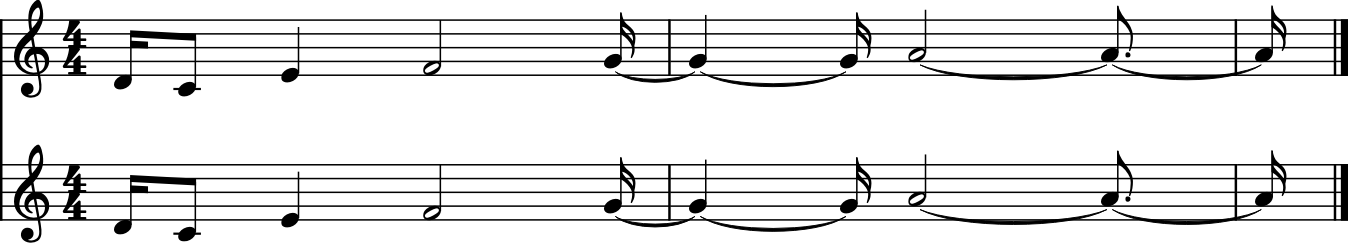

In [34]:
bla = Score (['D4', 'C4', 'E4', 'F4', 'G4', 'A4'], [1/4, 1/2, 1, 2, 1.5, 3]) #, 'Emajor')

In [35]:
class Score2:
    
    # Constructor
    def __init__(self, _notes, _rhythm ): #_range , _timeSignature = '4/4'):  
        
        #Create the score
        self.Menuet = stream.Score()
        
        #Create right-and left-hand parts, in 3/8 meter
        self.RightHand = stream.Part()
        self.RightHand.append(meter.TimeSignature('4/4'))
        self.LeftHand = stream.Part()
        self.LeftHand.append(meter.TimeSignature('4/4'))
        
        #Insert right- and left-hand parts at the beginning of the score
        self.Menuet.insert(0, self.RightHand)
        self.Menuet.insert(0, self.LeftHand)
        
        self.noteList = []
        #self.range = _range; # Dictionnary
        for i in range (4):#(len(_notes)):
            
            #_notes[i].duration.quarterLength =_rhythm[i]
            #self.d.quarterLength = _rhythm[i]
            
            self.noteList.append(_notes[i])
            #self.noteList[i].duration.quarterLength= _rhythm[i]
            print (self.noteList[i])
            print (self.noteList[i].duration)
        
        #Insert notes for the two hands in the corresponding stream.Part objects, depending on coin toss    
        self.RightHand.append(self.noteList)
        self.LeftHand.append(self.noteList)
        
        self.Menuet.show()
        
    
    # Show
    def show(self):
        self.Menuet.show()
        
    def play(self):
        play(self.Menuet())
    

C minor [0, 2, 3, 5, 7, 8, 10]


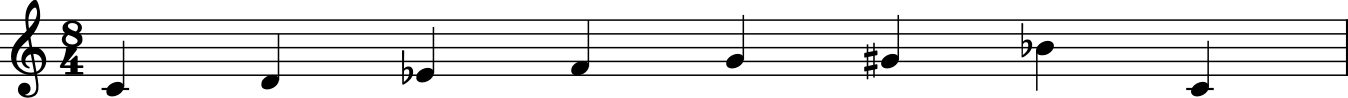

[<music21.note.Note C>, <music21.note.Note D>, <music21.note.Note E->, <music21.note.Note F>, <music21.note.Note G>, <music21.note.Note G#>, <music21.note.Note B->]
7
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E->
<music21.note.Note F>
<music21.note.Note G>
<music21.note.Note G#>
<music21.note.Note B->
['C', 'D', 'E-', 'F', 'G', 'G#', 'B-']
<music21.note.Note C>
<music21.duration.Duration 2.0>
<music21.note.Note D>
<music21.duration.Duration 2.0>
<music21.note.Note E->
<music21.duration.Duration 4.0>
<music21.note.Note F>
<music21.duration.Duration 0.5>
<music21.note.Note G>
<music21.duration.Duration 0.5>
<music21.note.Note G#>
<music21.duration.Duration 1.0>
<music21.note.Note B->
<music21.duration.Duration 0.5>


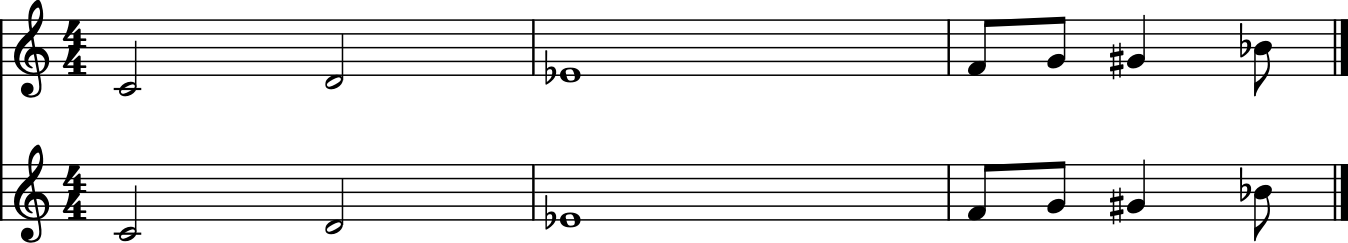

<music21.note.Note C>
<music21.duration.Duration 8.0>
<music21.note.Note D>
<music21.duration.Duration 8.0>
<music21.note.Note E->
<music21.duration.Duration 16.0>
<music21.note.Note F>
<music21.duration.Duration 2.0>
<music21.note.Note G>
<music21.duration.Duration 2.0>
<music21.note.Note G#>
<music21.duration.Duration 4.0>
<music21.note.Note B->
<music21.duration.Duration 2.0>


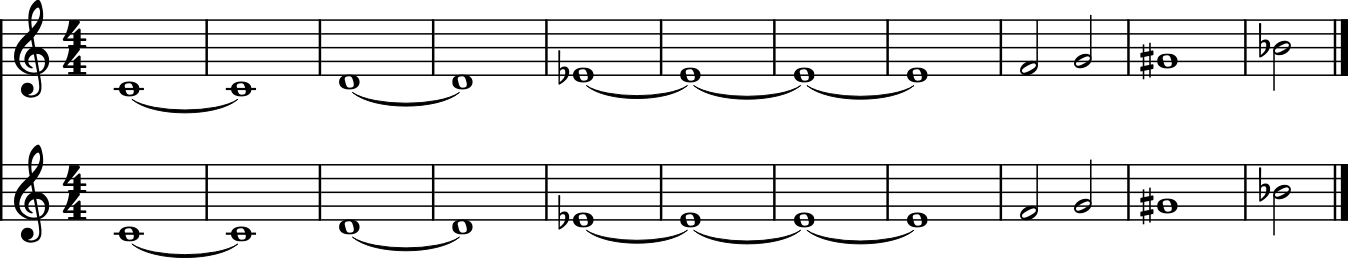

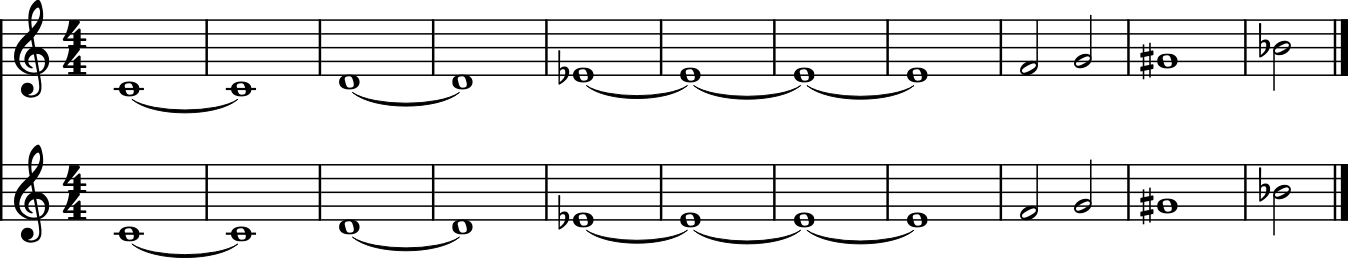

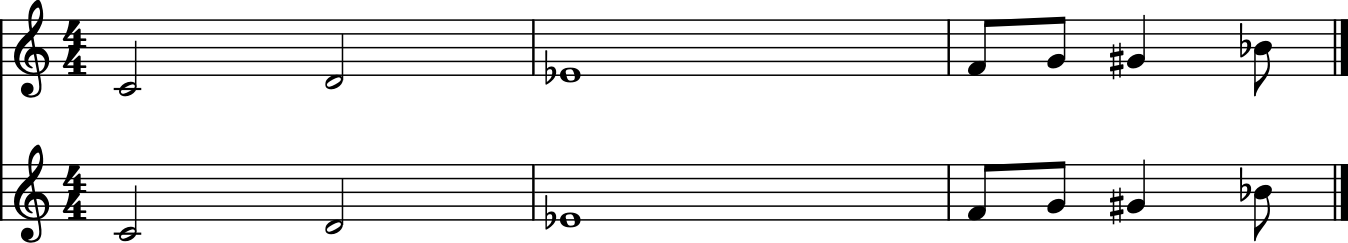

In [36]:
s = Scale(note.Note("C"), scalesIntervalDictionnary["minor"]);
s.show();
n= s.getNotesWithoutOctave()
print(n)

print(len(n))

m = []
for i in range (0,len(n)):
    print (n[i])
    m.append(n[i].pitch.name)
print(m)

quotient=[]

for number in pathH:
    quotient.append(number/4)

path = get_path(freq)
bla2 = Score (m, quotient) #, 'Emajor')
bla3 = Score (m, pathH)
bla3.show()
bla2.show()
#bla2.play()

### 

In [37]:
path = get_path(freq);
print (path)
path_rhythm = create_percussion(time_sig = '4/4')
print(path_rhythm)
path_rhythm = rhythm_from_sequence(path, rhythm=path_rhythm)
path_rhythm[3]

[4.0, 0.25, 8, 0.25, 4, 8.0, 16, 0.25, 12.0, 16, 4, 8, 4.0, 8, 8, 4, 8, 2, 2.0, 16, 8, 8, 2, 2, 0.125, 1, 4, 5.0, 8, 2, 6.0, 16, 8, 8, 4, 2, 4, 6.0, 16, 4, 8, 4, 16, 4, 1, 4, 7.0, 8, 2, 1, 1, 2, 2, 2, 8, 6.0, 16, 2, 2, 4, 2, 4, 1, 1, 8, 2, 4, 2.0, 4, 2, 2, 2, 2, 4, 2, 2, 4, 1, 2, 4, 1.0, 4, 0.25, 4, 2, 2.0, 4, 12.0, 16, 0.25, 4, 8, 2, 8, 0.25, 2.0, 4, 4, 2, 2, 4.0, 8, 2, 4, 2.0, 16, 1, 2, 2, 2, 2, 4, 3.0, 4, 2, 2, 8.0, 16, 16, 4, 4, 2, 4, 2, 4, 4, 4, 0.125, 2.0, 4, 0.125, 0.125, 8.0, 16, 2, 8, 4, 2.0, 4, 2, 2, 4, 4.0, 16, 8, 4, 2, 2, 0.125, 4, 8, 2.0, 8, 1, 4, 3.0, 4, 2, 2, 4, 2, 2.0, 4, 2, 4, 4, 2.0, 4, 4, 0.125, 0.25, 2.0, 8]
<music21.stream.Stream 0x21d4266b9d0>


<music21.note.Rest rest>

In [38]:
instruments = [instrument.Piano(), instrument.Percussion(), instrument.Guitar(), instrument.Flute()]

In [39]:
score = stream.Score()

measureBassNotes = stream.Part();
measureBassChords = stream.Part();

score.insert(0, measureBassChords);
score.insert(0, measureBassNotes);

for i in range(nbr):
    print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
    measureBassChords.append(bassChords[i].getChordObject());
    measureBassNotes.append(bassNotes[i]);



0 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
1 E m [<music21.note.Note E>, <music21.note.Note G>, <music21.note.Note B>]
2 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
3 F  [<music21.note.Note F>, <music21.note.Note A>, <music21.note.Note C>]
4 D m [<music21.note.Note D>, <music21.note.Note F>, <music21.note.Note A>]
5 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]
6 A m [<music21.note.Note A>, <music21.note.Note C>, <music21.note.Note E>]
7 C  [<music21.note.Note C>, <music21.note.Note E>, <music21.note.Note G>]


# The piece

In [40]:
instruments = [instrument.Piano(), instrument.Percussion(), instrument.Guitar(), instrument.Flute()]
scalesIntervalDictionnary = { # $$$ pourquoi redéfinir ici ?
  "major": [0,2,4,5,7,9,11],
  "minor": [0,2,3,5,7,8,10], 
}

## Spring

In [41]:
# instruments : piano, percussion, guitar , flute
# scale: E major
# 16:ronde, 8:blanche, 4:noire, 2:croche, 1:double croche
# 1/2:demi pause, 1/4:soupir, 1/8:demi soupir
#arr = [1, 2, 4, 8, 16, 1/2, 1/4, 1/8]; 
#freq = [10, 50, 30, 10, 5, 3, 2, 1];

E major [0, 2, 4, 5, 7, 9, 11]


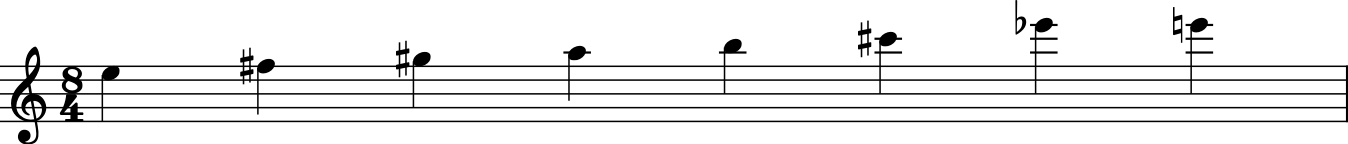


Chords:
0 E  [<music21.note.Note E>, <music21.note.Note G#>, <music21.note.Note B>]
1 A  [<music21.note.Note A>, <music21.note.Note C#>, <music21.note.Note E>]
2 E  [<music21.note.Note E>, <music21.note.Note G#>, <music21.note.Note B>]
3 B  [<music21.note.Note B>, <music21.note.Note E->, <music21.note.Note F#>]
4 E  [<music21.note.Note E>, <music21.note.Note G#>, <music21.note.Note B>]
5 A  [<music21.note.Note A>, <music21.note.Note C#>, <music21.note.Note E>]
6 E  [<music21.note.Note E>, <music21.note.Note G#>, <music21.note.Note B>]
7 B  [<music21.note.Note B>, <music21.note.Note E->, <music21.note.Note F#>]


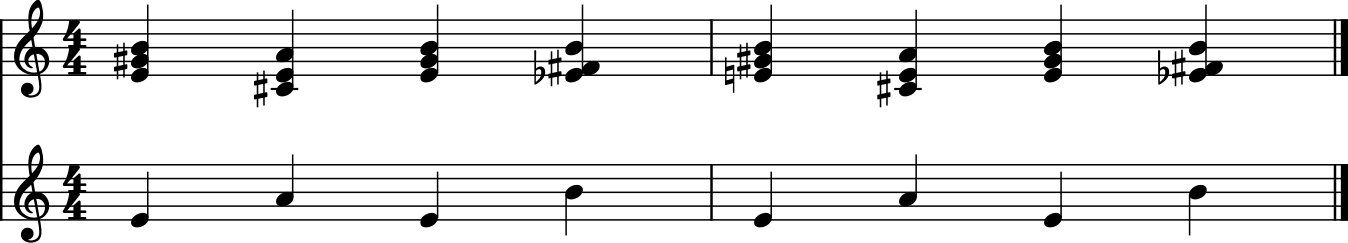

chose Note E5 chord E 
chose Note B4 chord E 
chose Note G#4 chord E 
chose Note G#4 chord E 
chose Note G#4 chord E 
chose Note A4 chord A 
chose Note A4 chord A 
chose Note A4 chord A 
chose Note A4 chord A 
chose Note E5 chord A 
chose Note G#4 chord E 
chose Note B4 chord B 
chose Note F#4 chord B 
chose Note B4 chord B 
chose Note E-5 chord B 
chose Note F#4 chord B 
chose Note G#4 chord E 
chose Note G#4 chord E 
chose Note C#5 chord A 
chose Note B4 chord E 
chose Note B4 chord E 
chose Note B4 chord E 
chose Note E5 chord E 
chose Note F#4 chord B 
chose Note E-5 chord B 
finished 8 8
chose Note E4 chord E 
chose Note E4 chord E 
chose Note B3 chord E 
chose Note G#4 chord E 
chose Note B3 chord E 
chose Note A4 chord A 
chose Note E4 chord A 
chose Note C#4 chord A 
chose Note E4 chord A 
chose Note C#4 chord A 
chose Note B3 chord E 
chose Note E-4 chord B 
chose Note E-4 chord B 
chose Note F#4 chord B 
chose Note F#4 chord B 
chose Note B3 chord B 
chose Note G#4 chord E 
c

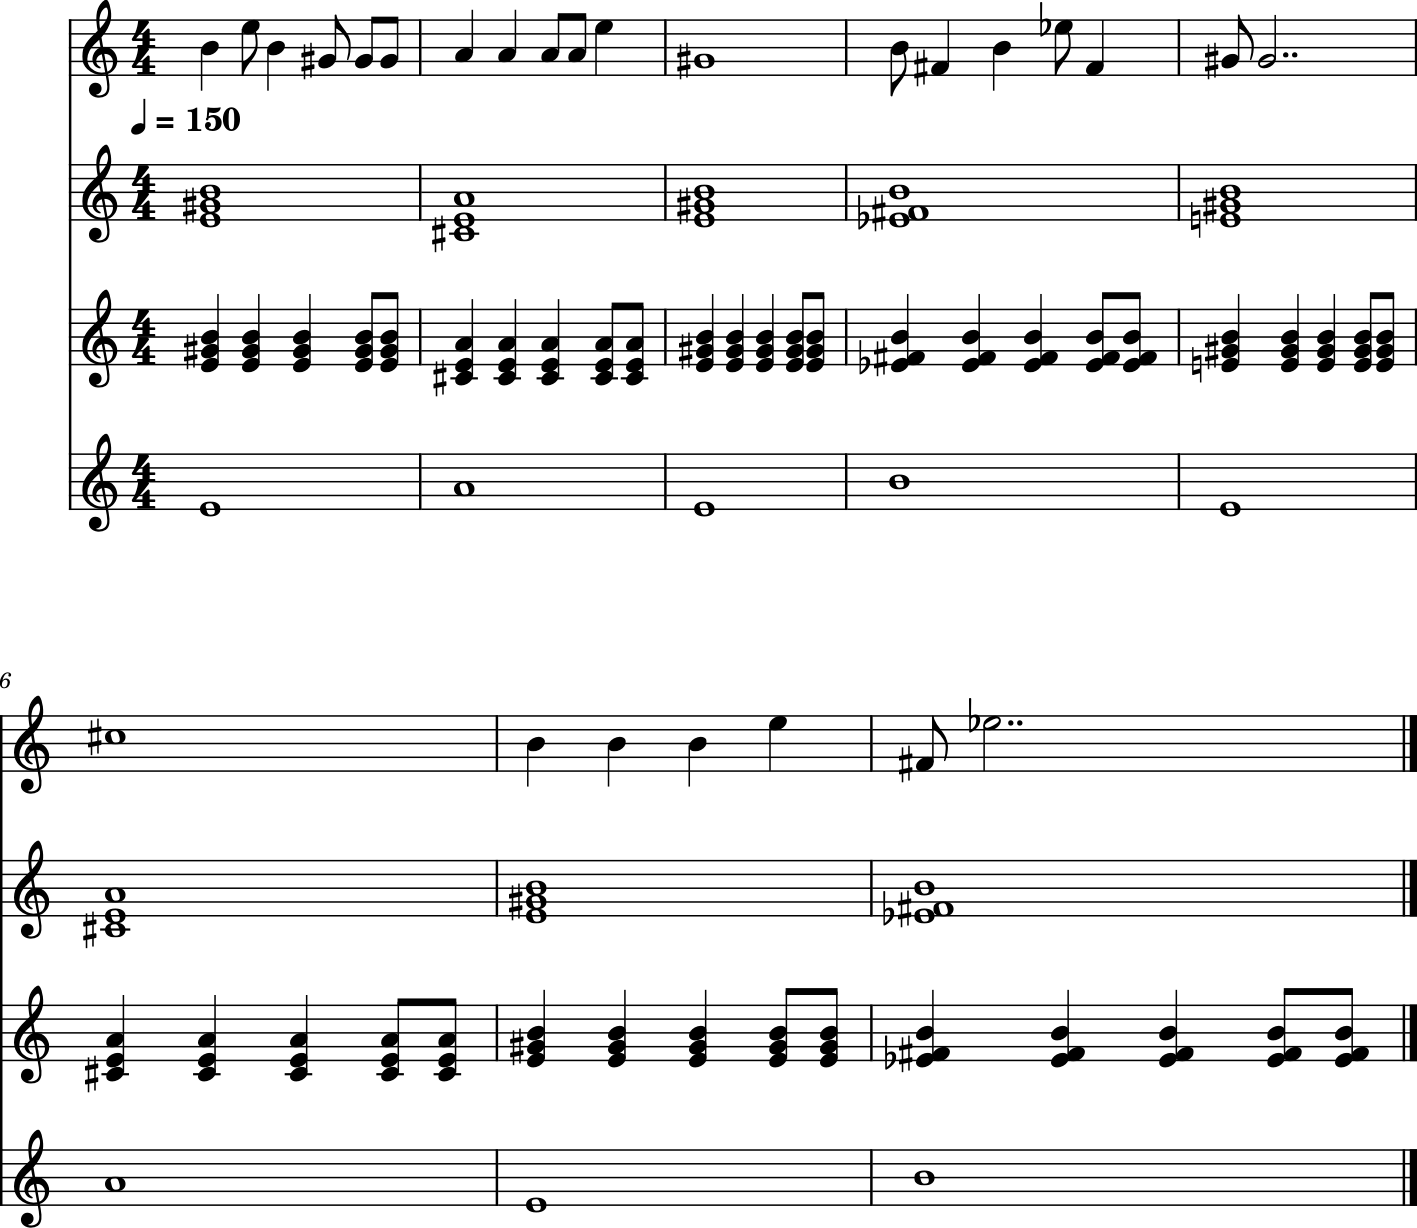

In [42]:
baseNoteSpring = note.Note('E5')
intervalSpring = scalesIntervalDictionnary["major"]
springScale = Scale (baseNoteSpring, intervalSpring)
springScale.show()
springChord = Chord(baseNoteSpring, springScale);
springFreq = [10, 30, 30, 10, 5, 3, 2, 1]

springOctaveRegion = 4
springChordsNumber = 4
springBassChords = getBassChords(springScale, springChordsNumber, springOctaveRegion);

for i in range(len(springBassChords)):
    springBassChords.append(springBassChords[i].copy());

springBassNotes = [note.Note(pitch = c.baseNote.pitch.name, octave = springOctaveRegion) for c in springBassChords];

showBass(springBassChords, springBassNotes, _play = False)

springDurations = get_path(springFreq)
springMelody = getMelody (springScale, springBassChords, springDurations)

springMelodyStream = getMelody(springScale, springBassChords, springDurations)

springBPM =150
springScore = mixMelodyChordsAndBass(springMelody, springBassChords, springBassNotes, springBPM, False)

springScore[0].insert(0, instrument.Flute())
springScore[1].insert(0, instrument.Contrabass())
springScore[2].insert(0, instrument.Contrabass())

#play(springScore)

In [43]:
springScore[1].insert(0, dynamics.Dynamic(1))
play(springScore)

In [90]:
springScore[1].insert(0, dynamics.Dynamic(0.2))
springScore[2].insert(0, dynamics.Dynamic(0.2))
play(springScore)

E major [0, 2, 4, 5, 7, 9, 11]


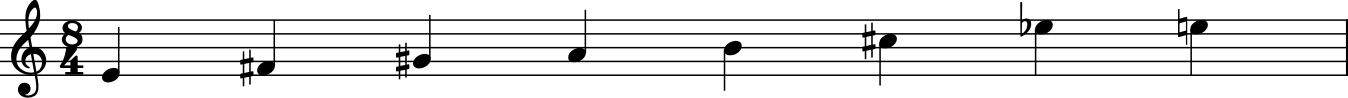

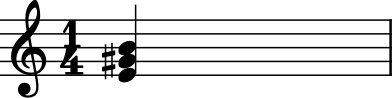

{ empty NotesRange }
<music21.note.Note E>
<music21.duration.Duration 4.0>
<music21.note.Note G>
<music21.duration.Duration 1.0>
<music21.note.Note G#>
<music21.duration.Duration 1.0>
<music21.note.Note C>
<music21.duration.Duration 1.0>
<music21.note.Note E->
<music21.duration.Duration 1.0>
<music21.note.Note B->
<music21.duration.Duration 0.5>
<music21.note.Note F>
<music21.duration.Duration 1.0>
<music21.note.Note C>
<music21.duration.Duration 0.5>
<music21.note.Note E->
<music21.duration.Duration 4.0>
<music21.note.Note G>
<music21.duration.Duration 0.5>
<music21.note.Note D>
<music21.duration.Duration 0.5>
<music21.note.Note C>
<music21.duration.Duration 1.0>
<music21.note.Note B->
<music21.duration.Duration 1.0>
<music21.note.Note D>
<music21.duration.Duration 0.125>
<music21.note.Note B->
<music21.duration.Duration 0.5>
<music21.note.Note E->
<music21.duration.Duration 1.0>
<music21.note.Note G>
<music21.duration.Duration 0.125>
<music21.note.Note E->
<music21.duration.Duration 

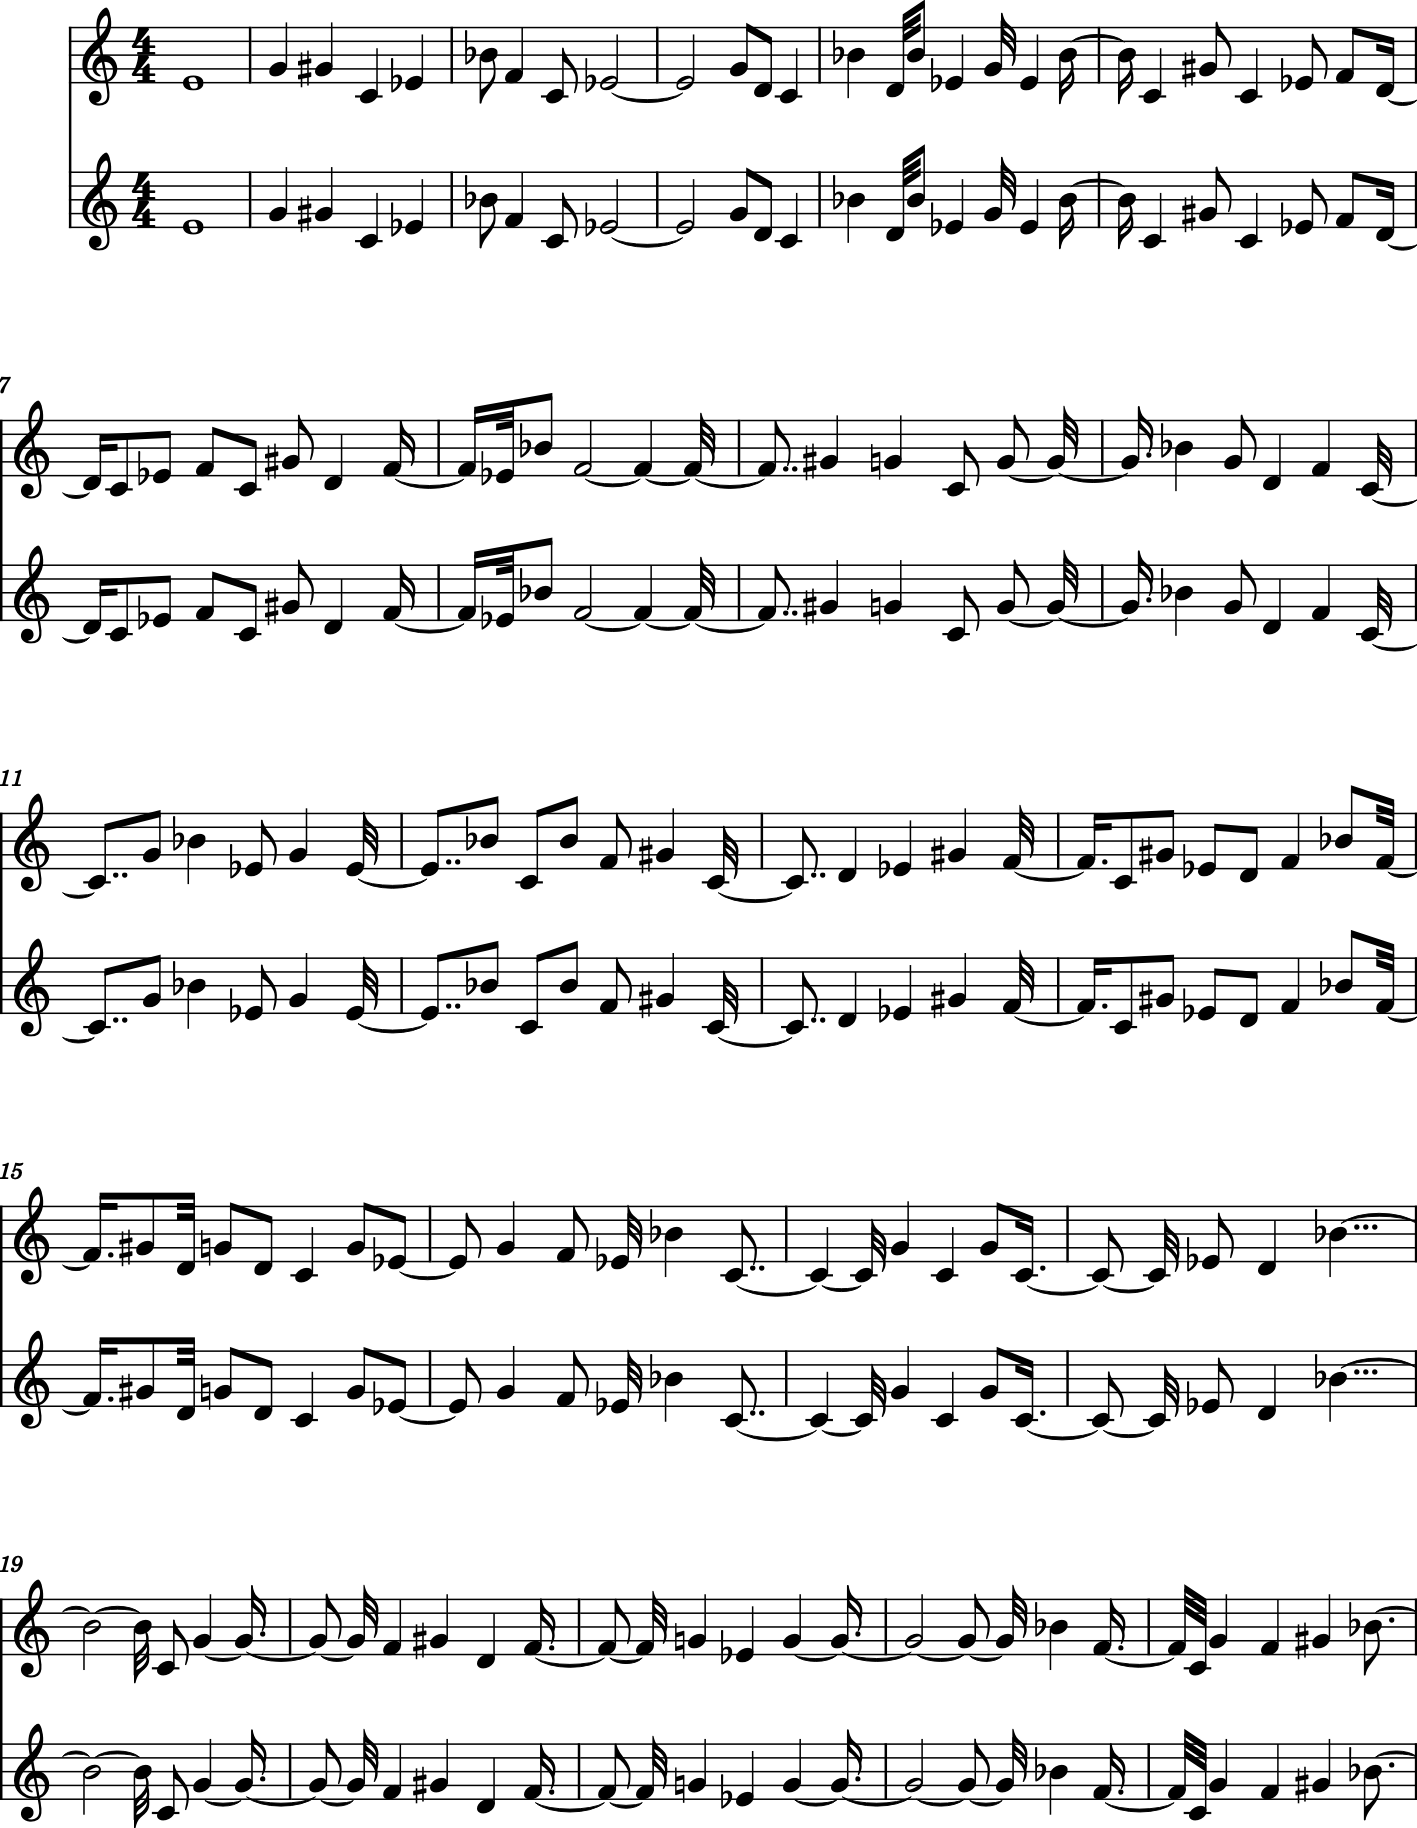

In [45]:
baseNoteSpring = note.Note('E4')
intervalSpring = scalesIntervalDictionnary["major"]
springScale = Scale (baseNoteSpring, intervalSpring)
springScale.show()

springChord = Chord(baseNoteSpring, springScale)
springChord.show()

springNotesRange = NotesRange()
springNotesRange.show()

springPath = get_path()

# input
octaveRegion = 2;
nbr = len(springPath);
bassNotes = [];  # stores music21's note.Note()
bassChords = []; # stores Chord objects

bassNotes.append(note.Note(pitch = springScale.baseNote.pitch.name, octave = octaveRegion)); # bassNotes[0]
bassChords.append(Chord(bassNotes[0], s));          

for i in range(nbr): 
    nr = NotesRange();
    nr.addChanceToNotesWithoutOctave(s.getNotesWithoutOctave()); # notes of the scale
    nr.multiplyChanceToNotesWithoutOctave(bassChords[i].getNotesWithoutOctave(), _probability = 3); # notes of the chord from the bassNotes[i]
    nr.multiplyChanceToNotesWithoutOctave([bassNotes[i]], _probability = 0); # avoir playing the same bassNotes[i] again
    nr.multiplyByFunction(intervalFunction(6), note.Note(pitch = 6, octave = octaveRegion)); # range, to stay in the octaveRegion
        
    #nr.showPlot();
    #nr.show();
    bassNotes.append(nr.pickRandomNote());     #bassNotes[i+1]
    bassChords.append(Chord(bassNotes[i+1], s)); #bassChords[i+1]
    
#print("\nChords:")
score = stream.Score()
score.timeSignature = meter.TimeSignature('4/4')

measureBassNotes = stream.Part();
measureBassChords = stream.Part();

score.insert(0, measureBassChords);
score.insert(0, measureBassNotes);

for i in range(nbr):
    #print(i, bassChords[i].getText(), bassChords[i].getNotesWithoutOctave());  
    measureBassChords.append(bassChords[i].getChordObject());
    measureBassNotes.append(bassNotes[i]);

#score.show();

m = []
p = []
for i in range (nbr):
    #m.append(measureBassChords[i].pitch.name)
    p.append(measureBassNotes[i].pitch.name)


quotient=[]

for number in springPath:
    
    if number>1 : quotient.append(number/4)
    else : quotient.append(number)

#lol = Score (m, quotient) #, 'Emajor')
springLeft = Score(p, quotient)
#springLeft.play()
#lol.show()
#lol2.show()

In [46]:
#springLeft.play()

## Summer

In [47]:
# instruments : piano, percussion, guitar ???
# scale:G minor

G minor [0, 2, 3, 5, 7, 8, 10]


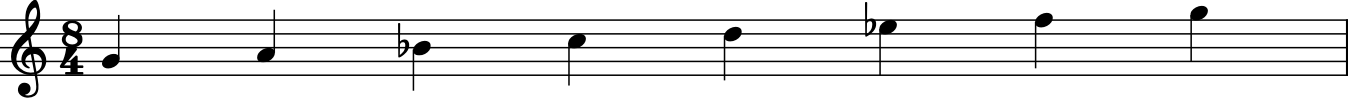

In [48]:
baseNoteSummer = note.Note('G4')
intervalSummer = scalesIntervalDictionnary["minor"]
summerScale = Scale(baseNoteSummer, intervalSummer)
summerScale.show()

## Autumn

In [49]:
# instruments : piano, percussion, guitar, violin
# scale: F major

F major [0, 2, 4, 5, 7, 9, 11]


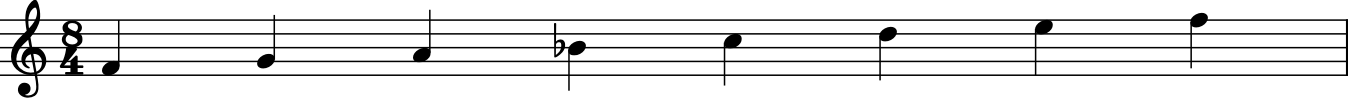

In [50]:
baseNoteAutumn = note.Note('F4')
intervalAutumn = scalesIntervalDictionnary["major"]
autumnScale = Scale(baseNoteAutumn, intervalAutumn)
autumnScale.show()

## Winter

In [51]:
# instruments : piano, percussion, guitar, counterbasson
# scale:F minor

F major [0, 2, 4, 5, 7, 9, 11]


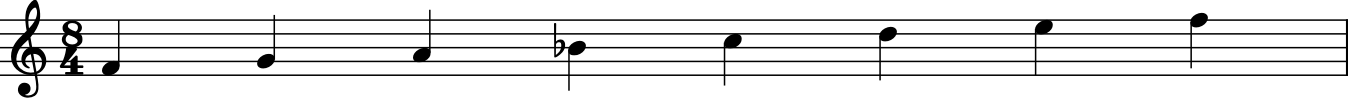

In [52]:
baseNoteWinter = note.Note('F4')
intervalWinter = scalesIntervalDictionnary["major"]
winterScale = Scale(baseNoteWinter, intervalWinter)
winterScale.show()